# Gradient Descent
Gradient descent is an empirical alternative to finding the ideal weights ($\theta$) that minimize a loss function. I like to think of it as a "mathematically-backed guess-and-check."

For some loss function $L(\theta_0, \theta_1)$:

We create an "update rule" for each parameter of $L$:

$$ \theta^{(n+1)}_0 = \theta^{(n)}_0 - \alpha \dfrac{\partial{L}}{\partial{\theta^{(n)}_0}} $$
$$ \theta^{(n+1)}_1 = \theta^{(n)}_1 - \alpha \dfrac{\partial{L}}{\partial{\theta^{(n)}_1}} $$

where 

* $\theta^{(n)}_0$ is our "starting guess"

* $\dfrac{\partial{L}}{\partial{\theta^{(n)}_0}}$ is the partial derivative of the loss function in terms of $\theta_0$

* $\alpha$ is the "step size", or how far we move in the direction of the partial derivative

* $\theta^{(n+1)}_0$ is our "new guess"

That's a lot of math, so let's just forget about all this for now.

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import pandas as po
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Brief Review on Function Optimization

Consider the following convex function: $f(x) = x^2$. In order to find the minimum of this function, we can do a couple of things.

**1. We can construct a plot and visually see the minimum is at $x = 0$.**

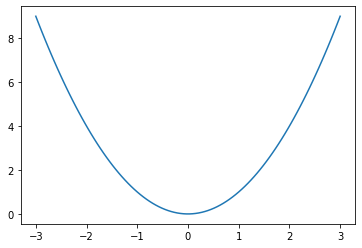

In [6]:
x = np.array(np.linspace(-3, 3, 100))
y = x**2

plt.plot(x, y)

**3. Good ol' guess and check**

Let's start at x = 3: $f(3) = 3^2 = 9$

Let's now check x = 2.9: $f(2.9) = 2.9^2 = 8.41$

Let's now check x = 2.8...

...

The minimum will be at whichever $x$ had the smallest $f(x)$. 

Of course, we'd never do this by hand; we can use Python for this!

#### Use code to print out all the values of $x$ and their corresponding values of $f(x)$. Identify values of $x$ that have the smallest value for $f(x)$.

In [7]:
import time

my_x_values = np.linspace(-3, 3, 10)
my_x_values


### SOLUTION ###
def f(x):
    return x**2

for x in my_x_values:
    print("x =", x,
          ", f(x) = ", f(x))
    time.sleep(1)

x = -3.0 , f(x) =  9.0
x = -2.3333333333333335 , f(x) =  5.4444444444444455
x = -1.6666666666666667 , f(x) =  2.777777777777778
x = -1.0 , f(x) =  1.0
x = -0.3333333333333335 , f(x) =  0.11111111111111122
x = 0.33333333333333304 , f(x) =  0.11111111111111091
x = 1.0 , f(x) =  1.0
x = 1.666666666666666 , f(x) =  2.777777777777776
x = 2.333333333333333 , f(x) =  5.444444444444443
x = 3.0 , f(x) =  9.0


You shouldn't be surprised by which $x$ values have the smallest $f(x)$. However, unlike the other two previous methods, we didn't really get an exact answer.

#### 4. Gradient Descent (*aka smart guess and check*)

From calculus, we know that the derivative at a minimum is 0 (gradient is just a fancy name for derivative). The idea is to keep guessing points that give us smaller and smaller derivatives. 

But really, we're not randomly guessing points anymore. Let's take a look at the function again, this time drawn with some tangent lines.

In [8]:
def draw_tan_lines(loc):
    x = np.array(np.linspace(-3, 3, 100))
    y = x**2
    
    slope = 2 * loc
    intercept = loc * loc
    tan_line_1 = np.array([slope*(i-loc)+intercept for i in x[0:100]]) # tangent line at x = 2

    f, ax = plt.subplots()
    ax.plot(x, y)
    ax.plot(x[0:100], tan_line_1)

    ax.set_ylim(-1, 9)
    ax.set_xlim(-3,3)
    plt.show()
interact(draw_tan_lines, loc=widgets.IntSlider(min=-3.0, max=3.0, step=1, value=0.0));

interactive(children=(IntSlider(value=0, description='loc', max=3, min=-3), Output()), _dom_classes=('widget-i…

KEY OBSERVATIONS: 
* if we are to the *left* of the minimum, the derivative will be negative
    * The farther left we are, the more negative our slope is
* if we are to the *right* of the minimum, the derivative will be positive
    * The father right we are, the more positive our slope is
    
*We can use these facts to guide us towards a slope of zero.*

In [ ]:
start = 2 # some arbitrary starting x-value
step = .1 # how far we move in the direction of the gradient

def derivative_of_f(x):
    """
    Returns derivative of the function f = x^2, evaluated at point x
    """
    return 2 * x


# "Update Rule"
start = start - (step * derivative_of_f(start))
start

1.6

In [ ]:
start = start - (step * derivative_of_f(start))
start

1.28

In [ ]:
start = start - (step * derivative_of_f(start))
start

1.024

And we keep going. The use of a for-loop here seems quite natural.

**In the code cell below, update your start variable 100 times using a for-loop. Plot the progression of your start value, with the iteration number on the x-axis, and your start-value on the y-axis.**

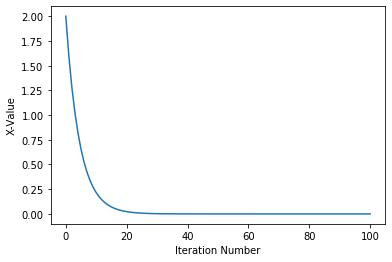

Last value:  4.0740719526689754e-10


In [ ]:
start = 2
step = .1
points = [start]

### SOLUTION ###
for _ in range(100):
    start = start - (step * derivative_of_f(start))
    points.append(start)

iteration_number = [i for i in range(101)]
plt.plot(iteration_number, points)
###

plt.xlabel("Iteration Number")
plt.ylabel("X-Value")
plt.show()
print("Last value: ", points[100])

**WOW! WE JUST USED GRADIENT DESCENT! THIS IS A BIG MILESTONE!**

Of course, we don't use gradient descent on just any function; we would apply this to our loss functions in order to find the optimal weight -- especially if the loss function we are using don't have an "easy" solution.

With multiple weights, we would be taking the *partial* derivative of the loss function, for each weight. This gives us multiple derivatives, which we put in a vector. This vector is called a *gradient*.

## Gradient Descent Summary
1. Pick an arbitrary starting point for weight $\theta_j$
2. Pick a value for $\alpha$ (usually small)
3. "Update" your starting point using the Update Rule
4. Keep updating until you're no longer making any "steps"
5. Repeat steps 1-4 for each $\theta_j$ in your loss function